# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404091701.xlsx",sheet_name='201404091701')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,14:23:51,206,-15,-8,30.0,1.00,DOWN,False,...,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,机场118,机场68,-0.0625,264000
1,4,9,17:01:50,204,45,-8,30.0,7.25,DOWN,False,...,3.21,0.96,-4.53,-4.55,-5.14,0.1250,机场118,机场68,0.1250,376480
2,4,9,17:01:51,202,52,-8,30.0,7.25,DOWN,False,...,3.60,0.98,-4.49,-4.52,-5.14,0.0625,机场118,机场68,0.0625,376480
3,4,9,17:01:52,204,38,-8,30.0,7.00,DOWN,False,...,3.27,0.99,-4.48,-4.49,-5.03,0.1250,机场118,机场68,0.1250,376480
4,4,9,17:01:53,203,26,-8,30.0,7.00,DOWN,False,...,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,机场118,机场68,-0.1250,376480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,4,10,7: 3:11,-100,-9,-8,30.0,2.00,DOWN,False,...,2.30,2.32,0.35,4.26,0.22,-0.0625,机场118,机场68,-0.0625,250080
50467,4,10,7: 3:12,-100,-5,-8,30.0,2.00,DOWN,False,...,2.08,2.48,0.41,4.29,0.34,0.0000,机场118,机场68,0.0000,250080
50468,4,10,7: 3:13,-101,6,-8,30.0,2.00,DOWN,False,...,2.12,2.50,0.49,4.29,0.40,0.0000,机场118,机场68,0.0000,250080
50469,4,10,7: 3:14,-101,14,-8,30.0,2.00,DOWN,False,...,2.28,2.63,0.38,4.26,0.33,0.0000,机场118,机场68,0.0000,250080


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50471 entries, 0 to 50470
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              50471 non-null  int64  
 1   日              50471 non-null  int64  
 2   具体时间           50471 non-null  object 
 3   海拔高度           50471 non-null  int64  
 4   下降率            50471 non-null  int64  
 5   无线电高度          50471 non-null  int64  
 6   计算空速           50471 non-null  float64
 7   地速             50471 non-null  float64
 8   起落架            1276 non-null   object 
 9   空地电门0.2秒       50471 non-null  bool   
 10  空地电门0.4秒       50471 non-null  bool   
 11  空地电门0.6秒       50471 non-null  bool   
 12  空地电门0.8秒       50471 non-null  bool   
 13  空地电门1秒         50471 non-null  bool   
 14  着陆G值0.1秒       50471 non-null  float64
 15  着陆G值0.2秒       50471 non-null  float64
 16  着陆G值0.3秒       50471 non-null  float64
 17  着陆G值0.4秒       50471 non-null  float64
 18  着陆G值0.

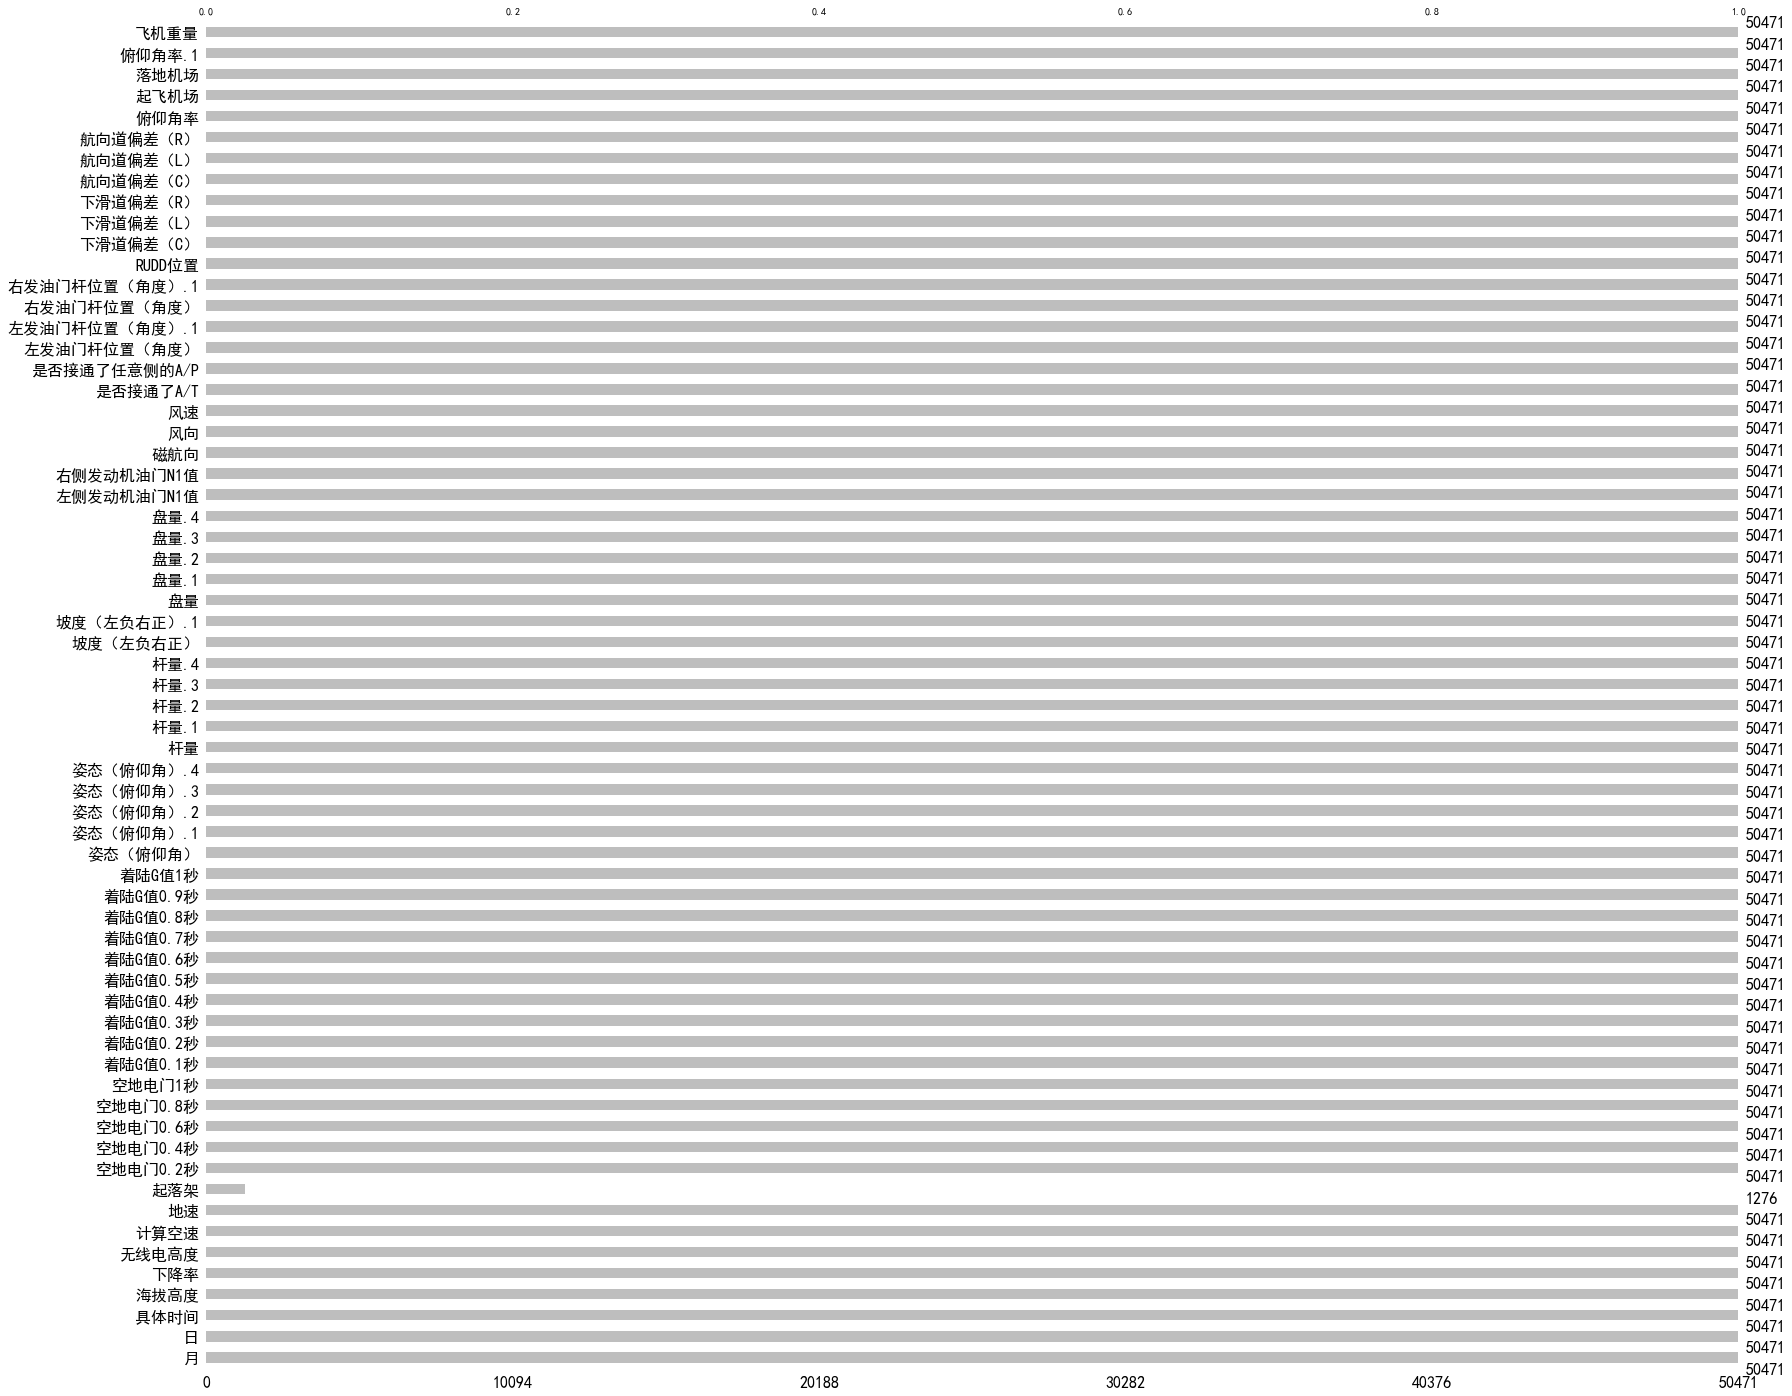

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,14:23:51,206,-15,-8,30.0,1.00,1.0,0,...,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,机场118,机场68,-0.0625,264000
1,4,9,17:01:50,204,45,-8,30.0,7.25,1.0,0,...,3.21,0.96,-4.53,-4.55,-5.14,0.1250,机场118,机场68,0.1250,376480
2,4,9,17:01:51,202,52,-8,30.0,7.25,1.0,0,...,3.60,0.98,-4.49,-4.52,-5.14,0.0625,机场118,机场68,0.0625,376480
3,4,9,17:01:52,204,38,-8,30.0,7.00,1.0,0,...,3.27,0.99,-4.48,-4.49,-5.03,0.1250,机场118,机场68,0.1250,376480
4,4,9,17:01:53,203,26,-8,30.0,7.00,1.0,0,...,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,机场118,机场68,-0.1250,376480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,4,10,7: 3:11,-100,-9,-8,30.0,2.00,1.0,0,...,2.30,2.32,0.35,4.26,0.22,-0.0625,机场118,机场68,-0.0625,250080
50467,4,10,7: 3:12,-100,-5,-8,30.0,2.00,1.0,0,...,2.08,2.48,0.41,4.29,0.34,0.0000,机场118,机场68,0.0000,250080
50468,4,10,7: 3:13,-101,6,-8,30.0,2.00,1.0,0,...,2.12,2.50,0.49,4.29,0.40,0.0000,机场118,机场68,0.0000,250080
50469,4,10,7: 3:14,-101,14,-8,30.0,2.00,1.0,0,...,2.28,2.63,0.38,4.26,0.33,0.0000,机场118,机场68,0.0000,250080


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,9,14:23:51,206,-15,-8,30.0,1.00,1.0,0,...,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,机场118,机场68,-0.0625,264000
1,4,9,17:01:50,204,45,-8,30.0,7.25,1.0,0,...,3.21,0.96,-4.53,-4.55,-5.14,0.1250,机场118,机场68,0.1250,376480
2,4,9,17:01:51,202,52,-8,30.0,7.25,1.0,0,...,3.60,0.98,-4.49,-4.52,-5.14,0.0625,机场118,机场68,0.0625,376480
3,4,9,17:01:52,204,38,-8,30.0,7.00,1.0,0,...,3.27,0.99,-4.48,-4.49,-5.03,0.1250,机场118,机场68,0.1250,376480
4,4,9,17:01:53,203,26,-8,30.0,7.00,1.0,0,...,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,机场118,机场68,-0.1250,376480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,4,10,7: 3:11,-100,-9,-8,30.0,2.00,1.0,0,...,2.30,2.32,0.35,4.26,0.22,-0.0625,机场118,机场68,-0.0625,250080
50467,4,10,7: 3:12,-100,-5,-8,30.0,2.00,1.0,0,...,2.08,2.48,0.41,4.29,0.34,0.0000,机场118,机场68,0.0000,250080
50468,4,10,7: 3:13,-101,6,-8,30.0,2.00,1.0,0,...,2.12,2.50,0.49,4.29,0.40,0.0000,机场118,机场68,0.0000,250080
50469,4,10,7: 3:14,-101,14,-8,30.0,2.00,1.0,0,...,2.28,2.63,0.38,4.26,0.33,0.0000,机场118,机场68,0.0000,250080


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,14:23:51,206,-15,-8,30.0,1.00,1.0,0,0,0,...,34.2334,-0.2598,0.05,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,-0.0625
1,17:01:50,204,45,-8,30.0,7.25,1.0,0,0,0,...,34.2334,-0.2695,3.22,3.21,0.96,-4.53,-4.55,-5.14,0.1250,0.1250
2,17:01:51,202,52,-8,30.0,7.25,1.0,0,0,0,...,34.2334,-0.2695,3.67,3.60,0.98,-4.49,-4.52,-5.14,0.0625,0.0625
3,17:01:52,204,38,-8,30.0,7.00,1.0,0,0,0,...,34.2334,-0.2617,3.15,3.27,0.99,-4.48,-4.49,-5.03,0.1250,0.1250
4,17:01:53,203,26,-8,30.0,7.00,1.0,0,0,0,...,34.2334,-0.2617,4.30,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,-0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,7: 3:11,-100,-9,-8,30.0,2.00,1.0,0,0,0,...,34.2773,-0.4004,2.32,2.30,2.32,0.35,4.26,0.22,-0.0625,-0.0625
50467,7: 3:12,-100,-5,-8,30.0,2.00,1.0,0,0,0,...,34.1895,-0.2988,2.12,2.08,2.48,0.41,4.29,0.34,0.0000,0.0000
50468,7: 3:13,-101,6,-8,30.0,2.00,1.0,0,0,0,...,34.1895,-0.2988,2.17,2.12,2.50,0.49,4.29,0.40,0.0000,0.0000
50469,7: 3:14,-101,14,-8,30.0,2.00,1.0,0,0,0,...,34.1895,-0.2949,2.29,2.28,2.63,0.38,4.26,0.33,0.0000,0.0000


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
1121,True,17:20:31,13112,-2138,1404,306.500,371.50,0.0,1,1,...,82.4853,-0.2617,-0.04,0.01,0.20,1.63,1.64,0.97,0.0625,0.0625
1122,True,17:20:31,13152,-2188,1404,306.750,371.50,0.0,1,1,...,82.4853,-0.2617,0.56,-0.17,0.00,3.05,2.68,2.08,0.0000,0.0000
1986,True,17:34:56,29003,-26,1404,319.500,496.75,0.0,1,1,...,60.9521,-0.2891,-0.05,0.10,-0.22,-0.17,-0.07,0.01,-0.0625,-0.0625
1987,True,17:34:56,29004,-18,1404,319.500,496.75,0.0,1,1,...,60.9521,-0.2930,-0.05,0.14,0.05,0.05,-0.14,0.04,-0.0625,-0.0625
5217,True,18:28:48,29001,16,1404,319.625,427.25,0.0,1,1,...,59.9414,-0.2598,0.00,0.04,0.00,-0.41,-0.22,-0.10,-0.0625,-0.0625
5218,True,18:28:48,28999,34,1404,319.750,427.25,0.0,1,1,...,59.9414,-0.2598,-0.01,0.15,0.01,-0.05,-0.02,0.03,0.0000,0.0000
8460,True,19:22:52,30002,-19,1404,318.625,423.00,0.0,1,1,...,60.2930,-0.2676,-0.16,-0.21,0.04,0.07,0.04,-0.07,-0.0625,-0.0625
8461,True,19:22:52,30002,-22,1404,318.750,423.00,0.0,1,1,...,60.2930,-0.2637,-0.11,-0.03,-0.03,-0.02,-0.11,-0.01,-0.0625,-0.0625
11705,True,20:16:58,30000,-1,1404,318.750,426.50,0.0,1,1,...,59.2822,-0.2617,-0.01,0.06,-0.11,0.00,-0.13,0.18,0.0000,0.0000
11706,True,20:16:58,29999,13,1404,318.750,426.50,0.0,1,1,...,59.2822,-0.2617,-0.20,-0.09,0.00,-0.09,-0.14,0.05,-0.0625,-0.0625


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,14:23:51,206,-15,-8,30.0,1.00,1.0,0,0,...,34.2334,-0.2598,0.05,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,-0.0625
1,False,17:01:50,204,45,-8,30.0,7.25,1.0,0,0,...,34.2334,-0.2695,3.22,3.21,0.96,-4.53,-4.55,-5.14,0.1250,0.1250
2,False,17:01:51,202,52,-8,30.0,7.25,1.0,0,0,...,34.2334,-0.2695,3.67,3.60,0.98,-4.49,-4.52,-5.14,0.0625,0.0625
3,False,17:01:52,204,38,-8,30.0,7.00,1.0,0,0,...,34.2334,-0.2617,3.15,3.27,0.99,-4.48,-4.49,-5.03,0.1250,0.1250
4,False,17:01:53,203,26,-8,30.0,7.00,1.0,0,0,...,34.2334,-0.2617,4.30,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,-0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,False,7: 3:11,-100,-9,-8,30.0,2.00,1.0,0,0,...,34.2773,-0.4004,2.32,2.30,2.32,0.35,4.26,0.22,-0.0625,-0.0625
50467,False,7: 3:12,-100,-5,-8,30.0,2.00,1.0,0,0,...,34.1895,-0.2988,2.12,2.08,2.48,0.41,4.29,0.34,0.0000,0.0000
50468,False,7: 3:13,-101,6,-8,30.0,2.00,1.0,0,0,...,34.1895,-0.2988,2.17,2.12,2.50,0.49,4.29,0.40,0.0000,0.0000
50469,False,7: 3:14,-101,14,-8,30.0,2.00,1.0,0,0,...,34.1895,-0.2949,2.29,2.28,2.63,0.38,4.26,0.33,0.0000,0.0000


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_35128\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,14:23:51,206,-15,-8,30.0,1.00,1.0,0,...,-0.2598,0.05,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625,-0.0625,1
1,False,False,17:01:50,204,45,-8,30.0,7.25,1.0,0,...,-0.2695,3.22,3.21,0.96,-4.53,-4.55,-5.14,0.1250,0.1250,1
2,False,False,17:01:51,202,52,-8,30.0,7.25,1.0,0,...,-0.2695,3.67,3.60,0.98,-4.49,-4.52,-5.14,0.0625,0.0625,1
3,False,False,17:01:52,204,38,-8,30.0,7.00,1.0,0,...,-0.2617,3.15,3.27,0.99,-4.48,-4.49,-5.03,0.1250,0.1250,1
4,False,False,17:01:53,203,26,-8,30.0,7.00,1.0,0,...,-0.2617,4.30,4.37,1.27,-4.42,-4.46,-5.05,-0.1250,-0.1250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,False,False,7: 3:11,-100,-9,-8,30.0,2.00,1.0,0,...,-0.4004,2.32,2.30,2.32,0.35,4.26,0.22,-0.0625,-0.0625,1
50467,False,False,7: 3:12,-100,-5,-8,30.0,2.00,1.0,0,...,-0.2988,2.12,2.08,2.48,0.41,4.29,0.34,0.0000,0.0000,1
50468,False,False,7: 3:13,-101,6,-8,30.0,2.00,1.0,0,...,-0.2988,2.17,2.12,2.50,0.49,4.29,0.40,0.0000,0.0000,1
50469,False,False,7: 3:14,-101,14,-8,30.0,2.00,1.0,0,...,-0.2949,2.29,2.28,2.63,0.38,4.26,0.33,0.0000,0.0000,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,206,-15,-8,30.0,1.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2598,0.05,-0.17,-0.05,-4.05,-4.08,-4.02,-0.0625
1,204,45,-8,30.0,7.25,1.0,0,0,0,0,...,34.2334,34.2334,-0.2695,3.22,3.21,0.96,-4.53,-4.55,-5.14,0.1250
2,202,52,-8,30.0,7.25,1.0,0,0,0,0,...,34.2334,34.2334,-0.2695,3.67,3.60,0.98,-4.49,-4.52,-5.14,0.0625
3,204,38,-8,30.0,7.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2617,3.15,3.27,0.99,-4.48,-4.49,-5.03,0.1250
4,203,26,-8,30.0,7.00,1.0,0,0,0,0,...,34.2334,34.2334,-0.2617,4.30,4.37,1.27,-4.42,-4.46,-5.05,-0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50466,-100,-9,-8,30.0,2.00,1.0,0,0,0,0,...,34.1895,34.2773,-0.4004,2.32,2.30,2.32,0.35,4.26,0.22,-0.0625
50467,-100,-5,-8,30.0,2.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2988,2.12,2.08,2.48,0.41,4.29,0.34,0.0000
50468,-101,6,-8,30.0,2.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2988,2.17,2.12,2.50,0.49,4.29,0.40,0.0000
50469,-101,14,-8,30.0,2.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2949,2.29,2.28,2.63,0.38,4.26,0.33,0.0000
